In [19]:
# Carga de paquetes necesarios
!pip install mysql-connector-python
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import mysql.connector
from sqlalchemy import create_engine

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# leer la base de datos de Titanic
file_path = ("/content/drive/MyDrive/google colab/titanic.csv")
titanic_df = pd.read_csv(file_path)

In [22]:
# 1. realizando un muestreo de los datos para ver su contenido
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q


In [23]:
# revisando qué columnas contiene el dataset
print(f"El dataset contiene {titanic_df.shape[0]} filas y {titanic_df.shape[1]} columnas")
print(f" Las columnas son: {list(titanic_df.keys())}")

El dataset contiene 891 filas y 12 columnas
 Las columnas son: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [28]:
# mirando los tipos de datos de las columnas
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#Eliminar columna cabin porque tiene mucos datos faltantantes
titanic_df = titanic_df.drop('Cabin', axis=1)

In [30]:
# Revisar cambios
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
# eliminar fila completa con celdas vacías
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [32]:
# mirando las variables aleatorias
titanic_df.describe(include=["number"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [33]:
# Describiendo los objetos
titanic_df.describe(include=['object'])

,Name,Sex,Ticket,Embarked
count,712,712,712,712
unique,712,2,541,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,453,7,554


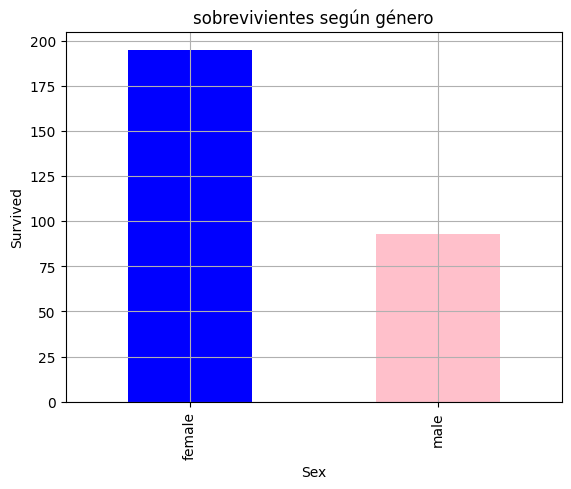

In [43]:
# Contar el número de sobrevivientes por género
survived_by_gender = titanic_df.groupby('Sex')['Survived'].sum()

# Crear el gráfico de barras
survived_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('sobrevivientes según género')
plt.grid(True)


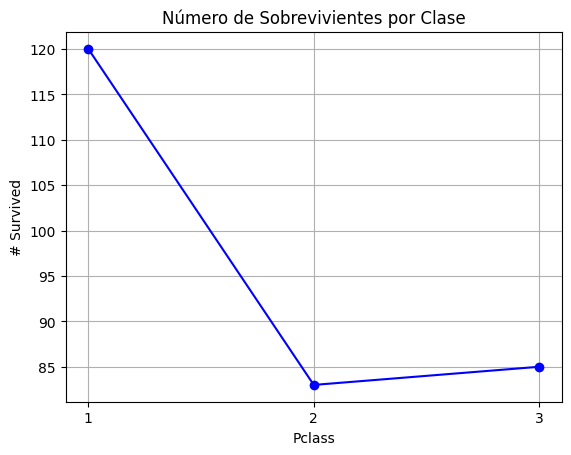

In [49]:
# Contar el número de sobrevivientes por class
survived_by_class = titanic_df.groupby('Pclass')['Survived'].sum()

# Crear el gráfico lineal
survived_by_class.plot(kind='line', marker='o', color='blue', linestyle='-')

# Personalizar el gráfico
plt.xlabel('Pclass')
plt.ylabel('# Survived')
plt.title('Número de Sobrevivientes por Clase')
plt.xticks(survived_by_class.index)  # Usar los índices como etiquetas del eje X
plt.grid(True)

# Mostrar el gráfico
plt.show()

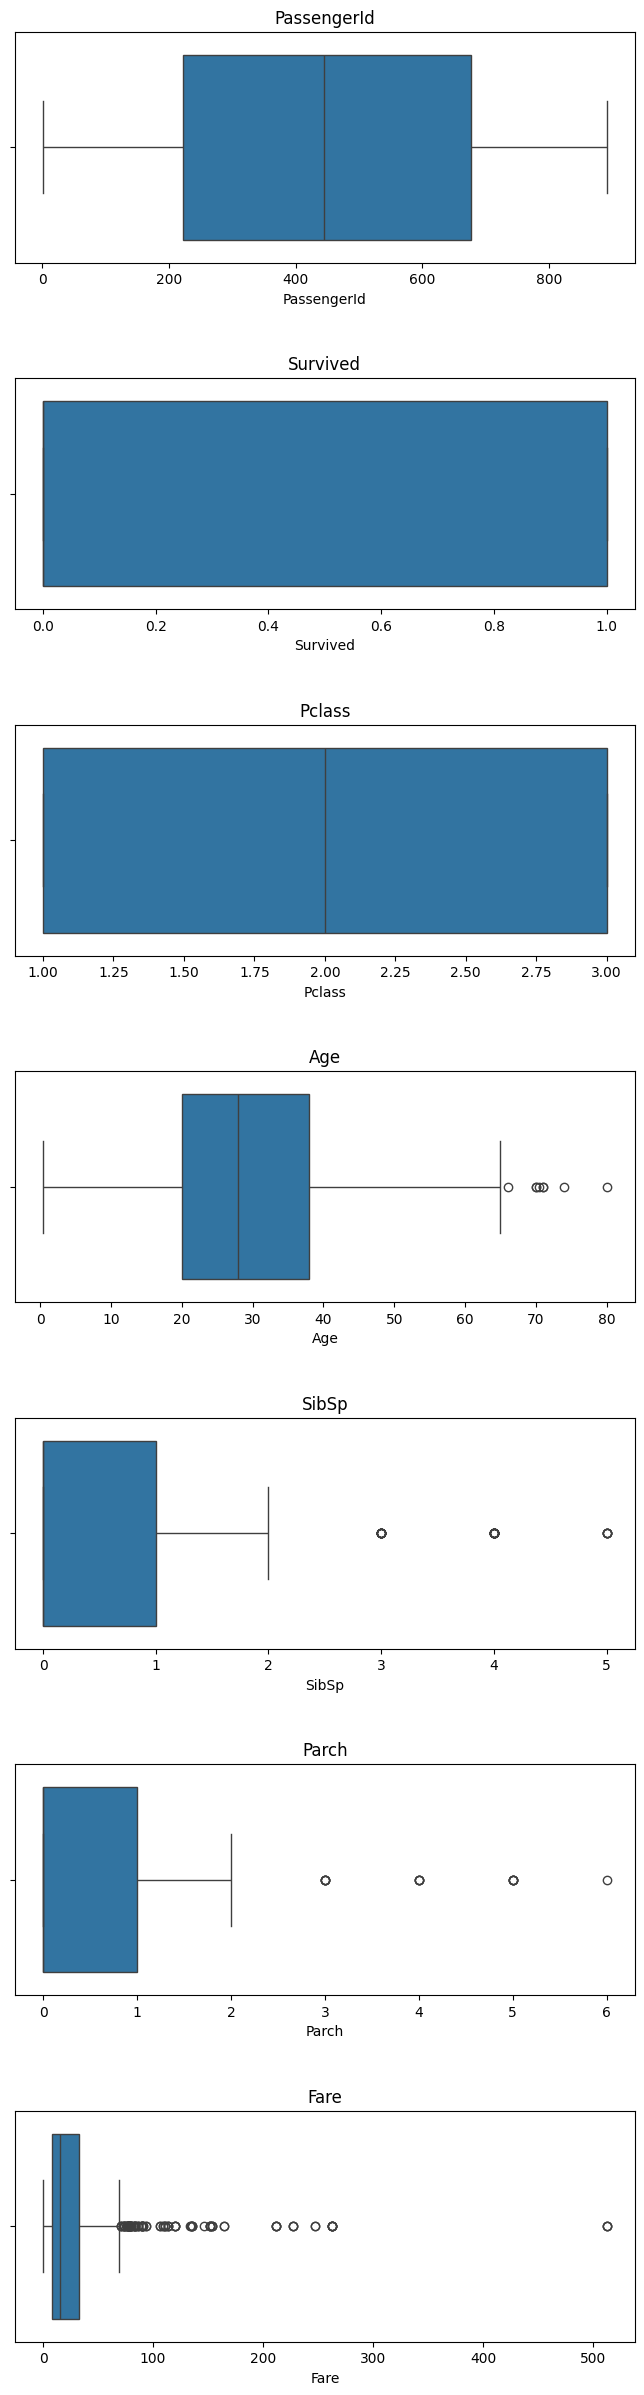

In [55]:
#Buscamos más datos atípicos en columnas numéricas, mirando los valores en cada columna
cols_num = [ 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30)) #crea una figura con 7 subgráficos dispuestos en una columna

fig.subplots_adjust(hspace=0.5) #ajusta el espaciado vertical entre los subgráficos

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=titanic_df, ax=ax[i])
    ax[i].set_title(col)

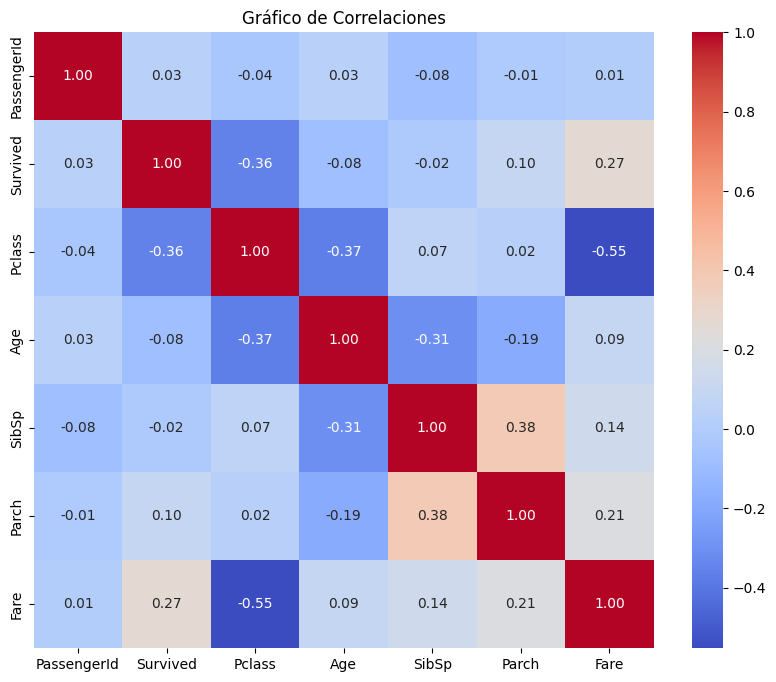

In [57]:
# Seleccionar las columnas de interés para el análisis de correlaciones
cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_df_selected = titanic_df[cols]

# Calcular la matriz de correlaciones
correlation_matrix = titanic_df_selected.corr()

# Crear el gráfico de correlaciones utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlaciones')

# Mostrar el gráfico
plt.show()